##### Continuing from Titanic dataset

# HANDLING MISSING VALUES

# 6. Frequent categories imputation - How to handle categorical Missing Values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
# SalePrice target variable

In [6]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [7]:
df.shape

(1460, 4)

In [8]:
# %age of missing values

# def MissValuepercentage(missingValues,):
#     for col in missingValues:
#         print(col + ", miss % = ", df[col].isnull().mean() *100)

# missingValues = ['BsmtQual','FireplaceQu','GarageType','SalePrice']
# MissValuepercentage(missingValues)    LMAO
#  or :p
(df.isnull().mean()*100).sort_values(ascending=False)

FireplaceQu    47.260274
GarageType      5.547945
BsmtQual        2.534247
SalePrice       0.000000
dtype: float64

In [9]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

###### in total of 1460 records replacing categorical missing values of 37 and 81 with most frequently repeating ones as this wont distort the dataset

# Computing frequency of every categories

In [10]:
df.groupby(['BsmtQual'])['BsmtQual'].count()
# or
# df['BsmtQual'].value_counts()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

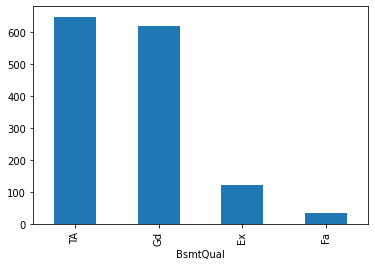

In [11]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='GarageType'>

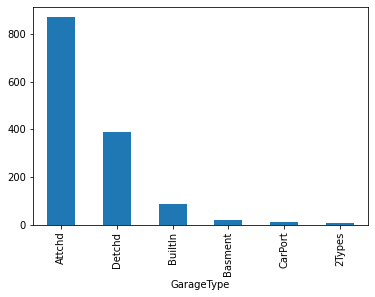

In [12]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='FireplaceQu'>

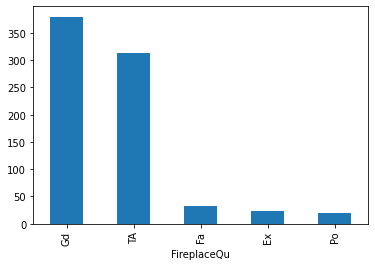

In [13]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [14]:
#### Replacing function
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    # or most_frequent_category = df[variable].mode()[0]
    df[variable].fillna(most_frequent_category, inplace=True)
    
    

In [15]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df, feature)
df.isnull().mean() # %age of null values 

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

##### On replacing FireplaceQu with most frequent data for 50% of missing values will distort the feature.

##### Advantages
1. easy
2. fast to implement

##### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's.
2. It distorts the relation of the most frequent label.

# 7. Adding a variable to capture NAN

In [16]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head()
# here we captured the importance of missing value

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [18]:
frequency = df['BsmtQual'].mode()[0]

In [19]:
df['BsmtQual'].fillna(frequency, inplace=True)

In [20]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [21]:
df['BsmtQual'].isnull().sum()

0

##### Disadvantage
1. If we use capturing importance of missing values the feature space will increase.


##### Advantages
2.  BsmtQual        37
    FireplaceQu    690
    GarageType      81
    SalePrice        0 
    as above FireplaceQu has MANY MISSING values which can be nicely handled by this method.

# 8. We replace NAN values with a whole new category (MOST USED)

In [22]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [23]:
def impute_nan(df, variable):
    df[variable+' newvar'] = np.where(df[variable].isnull(),"Missing",df[variable])# and then drop the old ones or rewrite on the same column
    df.drop(variable, axis=1, inplace=True)

In [24]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df, feature)

In [25]:
df.head()

,SalePrice,BsmtQual newvar,GarageType newvar,FireplaceQu newvar
0,208500,Gd,Attchd,Missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA


# Categorical features in Titanic dataset

# 9. 1 hot encoding

In [26]:
df = pd.read_csv('titanic/train.csv', usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [27]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [28]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [29]:
df = pd.read_csv('titanic/train.csv', usecols=['Embarked'])
df.head(5)

,Embarked
0,S
1,C
2,S
3,S
4,S


In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
# replace nan values with the above mentioned techniques
# here we are dropping them for fast progress
df.dropna(inplace=True)

In [32]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [33]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
pd.get_dummies(df, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


##### Lets say we have many categories then how to handle them using 1 hot encoding??
##### Continued in Mercesdata